Assignment 24.1 
Use a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [1]:
## Import warnings. 
import warnings
warnings.filterwarnings("ignore") 

## Import analysis modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score 

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc ,roc_auc_score


## Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
# loading the data set
Url=  "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic_train = pd.read_csv(Url)

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Instructions are to use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare 
# to predict whether a passenger survived.

In [5]:
## Basic information about the training set
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Assume that features such as PassengerID, Name of passengers, ticket number, and cabin number are irrelevant or insignificant in this analysis, thus I decided to exclude them.

# Exclude some features to reduce data dimension as also Embarked as per instructions

train = titanic_train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)

In [7]:
total=[train]

In [8]:
train.shape

(891, 7)

In [9]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
# **Dependent variable**: Survived
# **Predictors**:
# 1. Numerical
#     - Age: age in years
#     - Fare: Passenger fare
#     - SibSp: # of siblings / spouse aboard the Titanic
#     - Parch: # of parents / children aboard the Titanic
# 2. Categorical
#      - Pclass: Ticket Class (1st=1, 2nd=2, 3rd=3)
#      - Sex: male, female
# 3. Preprocessing**
#      - Check and Impute missing cases
#      - Discretization via binning
#      - Convert Discrete Features into Binary
#      - Convert categorical features to numeric
# **Training Set: Check and Impute missing cases**

## Missing cases for training set
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [11]:
## Age missing cases
train[train['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792


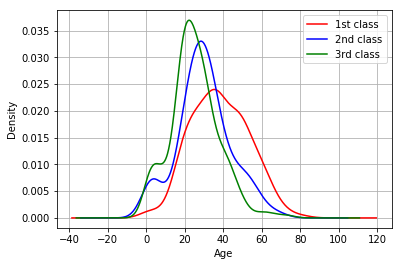

In [12]:
## Distribution of Age, condition = Pclass
train[train.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
train[train.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
train[train.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

In [13]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
# According to the distribution for "Age" feature, the median age for passengers deviates depending on three 
# different ticket classes. Thus, we may replace missing cases with the median age value 
# for each ticket class.

In [15]:
## Create function to replace NaN with the median value for each ticket class
def fill_missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Pclass"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset

train = fill_missing_age(train)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [17]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

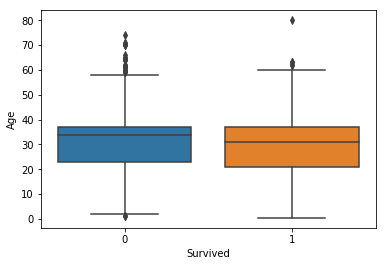

In [18]:
# **Discretization via binning**
# 
# In this section, I transferred two continuous features (Age and Fare) into discrete counterparts. 

## Boxplot for Age
sns.boxplot(x=train["Survived"], y=train["Age"])

In [19]:
## discretize Age feature
for dataset in total:
    dataset.loc[dataset["Age"] <= 9, "Age"] = 0
    dataset.loc[(dataset["Age"] > 9) & (dataset["Age"] <= 19), "Age"] = 1
    dataset.loc[(dataset["Age"] > 19) & (dataset["Age"] <= 29), "Age"] = 2
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[dataset["Age"] > 39, "Age"] = 4

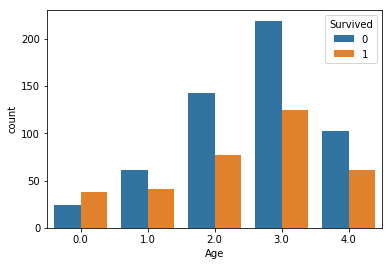

In [20]:
sns.countplot(x="Age", data=train, hue="Survived")

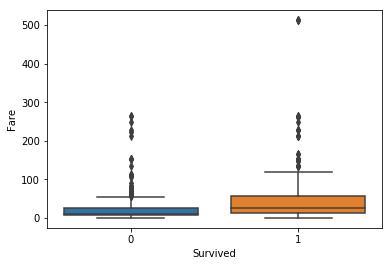

In [21]:
## Boxplot for Fare
sns.boxplot(x=train["Survived"], y=train["Fare"])

In [22]:
# The skewness of Fare feature is significantly high. Thus, discretized the number of bin size based 
# on the third quartile value; if the last bin starts with the third quartile value when bin size = n, 
# then n number of bin will be selected. 

# In[25]:

## discretize Fare
pd.qcut(train["Fare"], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

In [23]:
for dataset in total:
    dataset.loc[dataset["Fare"] <= 7.75, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.75) & (dataset["Fare"] <= 7.91), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 9.841), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 9.841) & (dataset["Fare"] <= 14.454), "Fare"] = 3   
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 24.479), "Fare"] = 4
    dataset.loc[(dataset["Fare"] >24.479) & (dataset["Fare"] <= 31), "Fare"] = 5   
    dataset.loc[(dataset["Fare"] > 31) & (dataset["Fare"] <= 69.487), "Fare"] = 6
    dataset.loc[dataset["Fare"] > 69.487, "Fare"] = 7   

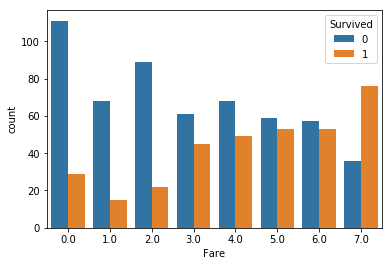

In [24]:
sns.countplot(x="Fare", data=train, hue="Survived")

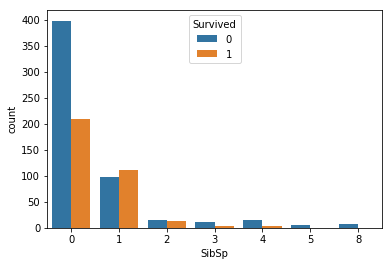

In [25]:
# **Convert Discrete Features into Binary**

## Countplot for the number of siblings/spouse
sns.countplot(x="SibSp", data=train, hue="Survived")

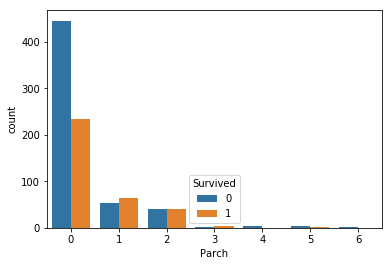

In [26]:
## Countplot for the number of parents/childrens
sns.countplot(x="Parch", data=train, hue="Survived")

In [27]:
# Since the majority of cases are zero for both discrete features, converted them into binary format.

## Convert SibSp into binary feature
for dataset in total:
    dataset.loc[dataset["SibSp"]==0, "SibSp"]=0
    dataset.loc[dataset["SibSp"]!=0, "SibSp"]=1

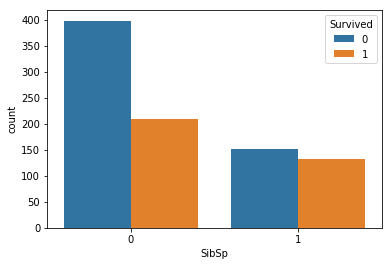

In [28]:
sns.countplot(x="SibSp", data=train, hue="Survived")

In [29]:
## Convert Parch into binary feature
for dataset in total:
    dataset.loc[dataset["Parch"]==0, "Parch"]=0
    dataset.loc[dataset["Parch"]!=0, "Parch"]=1

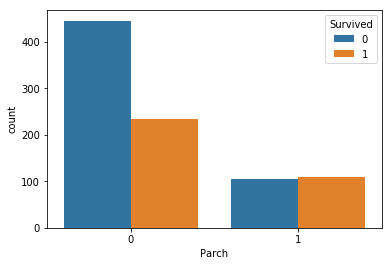

In [30]:
sns.countplot(x="Parch", data=train, hue="Survived")

In [31]:
## Scikit learn estimators require numeric features
sex = {'female':0,'male':1}   

In [32]:
## Convert categorical features to numeric using mapping function
for dataset in total:
    dataset['Sex'] = dataset['Sex'].map(sex)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,2.0,1,0,0.0
1,1,1,0,3.0,1,0,7.0
2,1,3,0,2.0,0,0,2.0
3,1,1,0,3.0,1,0,6.0
4,0,3,1,3.0,0,0,2.0


In [34]:
# Analyze features with visualization**
# 
# I calculated and visualized survival rate for each feature to see what sorts of people were likely to survive the tragedy. 

## total survival rate of train dataset
survived_cases=0
for i in range(891):
    if train.Survived[i]==1:
        survived_cases = survived_cases + 1

total_survival_rate = float(survived_cases)/float(891)

print('%0.4f' % (total_survival_rate))
# Total survival rate was 38.38%

0.3838


In [35]:
## Survival rate under each feature condition
def survival_rate(feature):
    rate = train[[feature, 'Survived']].groupby([feature], as_index=False).mean().sort_values(by=[feature], ascending=True)
    sns.factorplot(x=feature, y="Survived", data=rate)
    print(rate)

C:\Users\Jaideep\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jaideep\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


   Age  Survived
0  0.0  0.612903
1  1.0  0.401961
2  2.0  0.350000
3  3.0  0.363372
4  4.0  0.374233
   Fare  Survived
0   0.0  0.207143
1   1.0  0.180723
2   2.0  0.198198
3   3.0  0.424528
4   4.0  0.418803
5   5.0  0.473214
6   6.0  0.481818
7   7.0  0.678571
   SibSp  Survived
0      0  0.345395
1      1  0.466431


C:\Users\Jaideep\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jaideep\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jaideep\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings

   Parch  Survived
0      0  0.343658
1      1  0.511737
   Sex  Survived
0    0  0.742038
1    1  0.188908
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


C:\Users\Jaideep\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


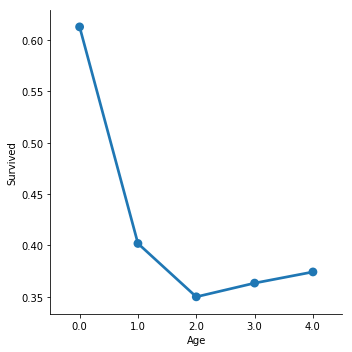

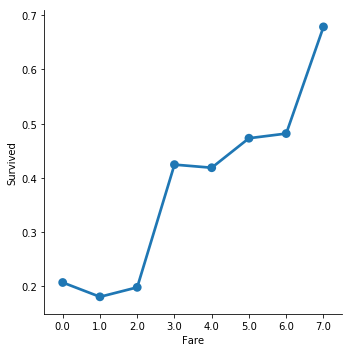

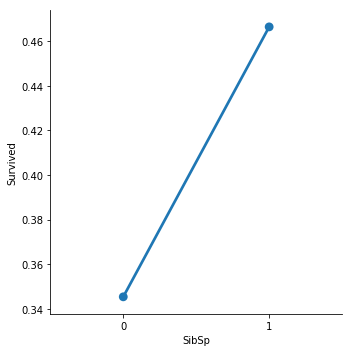

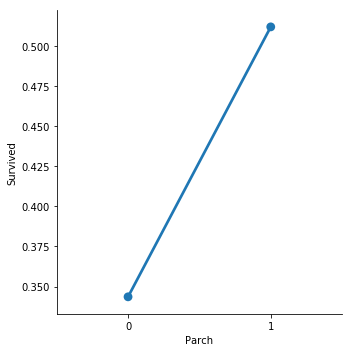

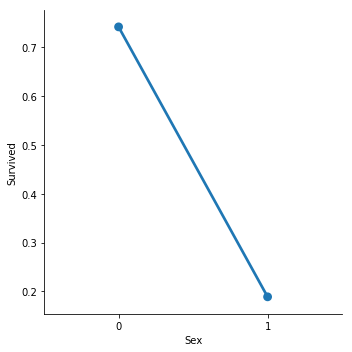

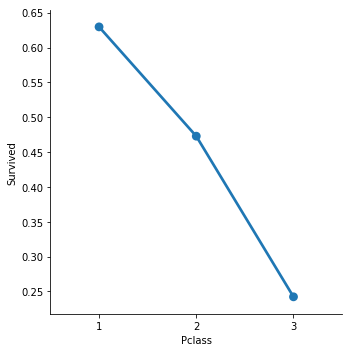

In [36]:
for feature in ["Age", "Fare", "SibSp", "Parch", "Sex", "Pclass"]:
    survival_rate(feature)

In [37]:
# - **Age**: As  expected from the beginning, young passengers (Age<=9) were more likely to survive than the elder. 
#   Age bin for passengers with the lowest survival rate was from 30 to 39, 
#   indicating that middle-age people sacrificed themselves when the tragedy occurred. 
# 
# 
# - **Fare / Pclass**: The survival rate significantly increased when passenger belonged to the first class. 
#   The bar graph below showed that fare and ticket class were closely related to each other. Therefore, we may 
#   explicitly assume that the rich were more likely to survive the tragedy. 
# 
# 
# - SibSp / Parch: The graphs of these two features were very similar; passengers with family were more
#  likely to survive than those who came alone. 
# 
# 
# - **Sex**: As  expected from the beginning, the survival rate for female passengers were significantly 
#   higher than the one for male. 
# 

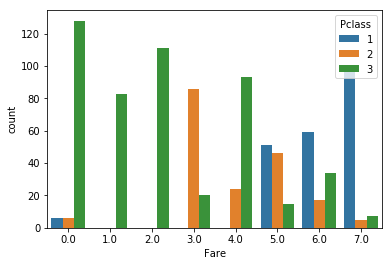

In [38]:
## Inter-relationship between Fare and Pclass
sns.countplot(x="Fare", data=train, hue="Pclass")

In [39]:
# ** Validation Testing and Prediction**
# - Split data into training and validation sets
# - Decision Tree Classification
# - Prediction using Testing set
# **Split data into testing and validation sets**

In [40]:
## Seperate input features from target feature
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [41]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,2.0,1,0,0.0
1,1,0,3.0,1,0,7.0
2,3,0,2.0,0,0,2.0
3,1,0,3.0,1,0,6.0
4,3,1,3.0,0,0,2.0


In [42]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
## Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=1)

In [44]:
## Take a look at the shape
x_train.shape, y_train.shape

((668, 6), (668,))

In [45]:
# **Decision Tree Classification**
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [46]:
## Run 5 fold cross validation

In [47]:
cvs = cross_val_score( clf, x_train, y_train, cv = 5)
print(cvs)

[0.77037037 0.82835821 0.81954887 0.81203008 0.78195489]


In [48]:
## Show cross validation score mean and std
print("Accuracy: %0.4f (+/- %0.4f)" % (cvs.mean(), cvs.std()*2))

Accuracy: 0.8025 (+/- 0.0448)


In [49]:
# The cross validation test result showed that accuracy of the model is 0.8025. 
# Thus, we may conclude that 80.25% of cross-validation set tuples were correctly classified by this model.

## Fit the model with data
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [50]:
## Accuracy
acc_decision_tree = round(clf.score(x_train, y_train), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))

Accuracy: 0.8802


In [51]:
# We split the data into 75% training and 25% validation sets, and fitted the model. 
# Based on this split, classifier accuracy of the model turned out to be 0.8802
# Thus, we may conclude that 88.02% of validation set tuples were correctly classified by this model.

## Predict y given validation set
predictions = clf.predict(x_test)

In [52]:
## Take a look at the confusion matrix ([TN,FN],[FP,TP])
conf_matrix=confusion_matrix(y_test,predictions)
print(conf_matrix)

[[123   5]
 [ 41  54]]


In [53]:
## Precision
print("Precision: %0.4f" % precision_score(y_test, predictions))

Precision: 0.9153


In [54]:
# The precision is 0.9153
# Thus, we may conclude that 91.53% of tuples that the classifier labeled as positive are actually positive by this model.

In [55]:
## Recall score
print("Recall: %0.4f" % recall_score(y_test, predictions))

Recall: 0.5684


In [56]:
# The recall is 0.5684
# Thus, we may conclude that 56.84% of real positive tuples were classified by the decision tree classifier.

In [57]:
## Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       128
           1       0.92      0.57      0.70        95

   micro avg       0.79      0.79      0.79       223
   macro avg       0.83      0.76      0.77       223
weighted avg       0.82      0.79      0.78       223



In [58]:
from IPython.display import display, HTML, Image
def display_confusion_matrix(data):
    """Display confusion matrix in a nice table."""
    data_prep = [['<center><b>True Negative</b><br><br>','<center><b>False Positive</b><br><br>'],
                 ['<center><b>False Negative</b><br><br>','<center><b>True Positive</b><br><br>']]
    
    print_data = [[data_prep[0][0]+str(data[0][0]), data_prep[0][1]+str(data[0][1])],
                  [data_prep[1][0]+str(data[1][0]), data_prep[1][1]+str(data[1][1])]]
    display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr align="center">'.join(
            '<td width="150" align="center">{}</td>'.format('</td><td width="150" align="center">'.join(str(_) for _ in row)) for row in print_data)
        )
    ))

In [59]:
# Confusion Matrix - Test data
# Using metrics.confusion_matrix function
cm = metrics.confusion_matrix(y_test, predictions)
data = cm.tolist()
print("cm returned from sklearn:", data)
display_confusion_matrix(data)

cm returned from sklearn: [[123, 5], [41, 54]]


True Negative123,False Positive5
False Negative41,True Positive54


In [60]:
def manually_calculate_tp_tn_fp_fn(test_y, test_predictions):
    """Manually create confusion matrix by comparing predictions with answers."""
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    x = 0
    while x < len(test_y):
        if test_y[x] == 0 and test_predictions[x] == 0:
            TN += 1
        if test_y[x] == 0 and test_predictions[x] == 1:
            FP += 1
        if test_y[x] == 1 and test_predictions[x] == 1:
            TP += 1
        if test_y[x] == 1 and test_predictions[x] == 0:
            FN += 1
        x += 1

    cm = [[TN, FP],[FN, TP]]
    return cm

In [61]:
# Manually double check the Confusion Matrix values
test = y_test.tolist()
preds = predictions.tolist()
manual = manually_calculate_tp_tn_fp_fn(test, preds)

print("\nsklearn cm:", data)
print("Manual:", manual)
if data == manual:
    print("\nThe cm returned from sklearn has been manually confirmed.")
else:
    print("\nSomething went wrong. Recheck the Confusion Matrix.")


sklearn cm: [[123, 5], [41, 54]]
Manual: [[123, 5], [41, 54]]

The cm returned from sklearn has been manually confirmed.


In [62]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

TN, FP, FN, TP = get_confusion_matrix_values(y_test,predictions)

total1=sum(sum(conf_matrix))

print("Total Test     = " , total1)
print('True positive  = ', TP )
print('False positive = ', FP)
print('False negative = ', FN )
print('True negative  = ', TN)



accuracy1 = 100 * (TP + TN ) / total1
print ('Accuracy                            : %0.2f - the proportion of the total number of predictions that were correct' %accuracy1)

sensitivity1 = 100 * TP / (TP + FN )
print('TPR/Sensitivity/Recall/Hit Rate     : %0.2f - the proportion of actual positive cases which are correctly identified' %sensitivity1 )

specificity1 = 100 * TN / (FP + TN)
print('Specificity                         : %0.2f - the proportion of actual negative cases which are correctly identified' %specificity1)

precision1 = 100 * TP / (TP + FP)
print('Precision/Positive Predictive Value : %0.2f - the proportion of positive cases that were correctly identified' %precision1)

negativepredvalue = 100 * TN / (FN + TN)
print('Negative Predictive Value           : %0.2f - the proportion of negative cases that were correctly identified' %negativepredvalue)

falsepositiveratevalue = 100 * FP / (FP + TN)
print('False Positive Rate(FPR)/Fall-out   : %0.2f - the proportion of negative data points that are mistakenly considered as positive' %falsepositiveratevalue)

Error = (FP + FN )/total1
print('Classification Error: {:.2f}'.format(Error))

Total Test     =  223
True positive  =  54
False positive =  5
False negative =  41
True negative  =  123
Accuracy                            : 79.37 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 56.84 - the proportion of actual positive cases which are correctly identified
Specificity                         : 96.09 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 91.53 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 75.00 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 3.91 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.21


In [63]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, predictions)
print("FP : ",fp)
print("TP : ",tp)
print("TH : ",th)
roc_auc = auc(fp, tp)

FP :  [0.        0.0390625 1.       ]
TP :  [0.         0.56842105 1.        ]
TH :  [2 1 0]


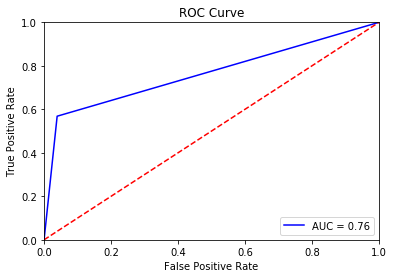

In [64]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
# Conclusion:**
# 
# To sum up, fromthe training data set passengers had higher chance of survival:
# 
# - if they belonged to the first class (or held expensive ticket)
# 
# - if they were female
# 
# - if they were young
# 
# - if they had family
# 
# Among these five conditions, ticket class, sex, and age were the most influential on survival. 
# 
# To test the validity of the classification model, I split the "train" data into 75% of training and 25% of validation sets. 
# And it gave us significantly high accuracy: The classification model predicted 88.02% of validation set tuples correctly. 
# However, the prediction score was not as good as its accuracy or precision. Only 56.84% of true survival 
# cases were detected by the classifier.
# 
# We would need further studies or data that would give us insight to improve the predictive model. 

In [66]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,2.0,1,0,0.0
1,1,1,0,3.0,1,0,7.0
2,1,3,0,2.0,0,0,2.0
3,1,1,0,3.0,1,0,6.0
4,0,3,1,3.0,0,0,2.0


In [67]:
## Seperate input features from target feature
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [68]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,2.0,1,0,0.0
1,1,0,3.0,1,0,7.0
2,3,0,2.0,0,0,2.0
3,1,0,3.0,1,0,6.0
4,3,1,3.0,0,0,2.0


In [69]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [70]:
X.shape,  y.shape

((891, 6), (891,))

In [71]:
# Desired number of Cross Validation folds

from sklearn.model_selection import KFold
cv = KFold(n_splits=10,shuffle=True,random_state=1)
cv

KFold(n_splits=10, random_state=1, shuffle=True)

In [72]:
accuracies = list()
accuracies

[]

In [73]:
max_attributes = len(list(test))
max_attributes

223

In [74]:
depth_range = range(1, max_attributes + 1)
depth_range

range(1, 224)

In [75]:
# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass

for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
#    print("\nCurrent max depth: ", depth)
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)

    accuracies.append(avg)              
#    print("Accuracy per fold: ", fold_accuracy)
#    print("Average accuracy: ", avg)
#    print("\n")

In [76]:
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range , "Average Accuracy": accuracies})

In [77]:
df.head()

,Max Depth,Average Accuracy
0,1,0.786816
1,2,0.768826
2,3,0.814869
3,4,0.819363
4,5,0.823870


In [78]:
df = df[["Max Depth", "Average Accuracy"]]

In [79]:
print(df.to_string(index=False))

Max Depth  Average Accuracy
        1          0.786816
        2          0.768826
        3          0.814869
        4          0.819363
        5          0.823870
        6          0.819351
        7          0.814831
        8          0.804769
        9          0.794669
       10          0.800300
       11          0.803658
       12          0.802534
       13          0.803658
       14          0.804769
       15          0.803658
       16          0.803658
       17          0.803658
       18          0.802534
       19          0.803645
       20          0.802534
       21          0.805893
       22          0.803658
       23          0.802534
       24          0.803658
       25          0.803658
       26          0.805893
       27          0.803658
       28          0.803658
       29          0.802534
       30          0.804782
       31          0.804769
       32          0.804782
       33          0.803645
       34          0.804782
       35          0

The best max_depth parameter seems therefore to be 5 (82.38% average accuracy across the 10 folds), and feeding the model with more data results in worst results probably due to over-fitting. We'll therefore use 5 as the max_depth parameter for our final model.

On the basis of Train Test split method, get accuracy of 79.37% which is pretty good as a model. 
With  K fold cross validation on the model across the dataset, it's found that accuracy score with max depth as 5 is 82.38%